In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np


iris = pd.read_csv("iris.csv")

In [2]:
print(iris.shape) # DataSet's Shape

(150, 5)


In [3]:
print(iris.columns) # All Columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
iris["species"].value_counts() # Different Classes/DependentVariable/ResponseLabel 

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

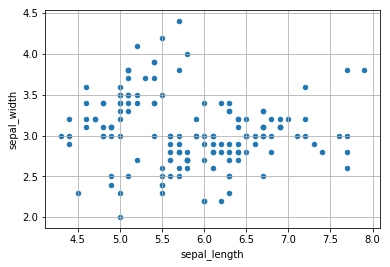

In [5]:
# 2d Scater Plot:

iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.grid()
plt.show()

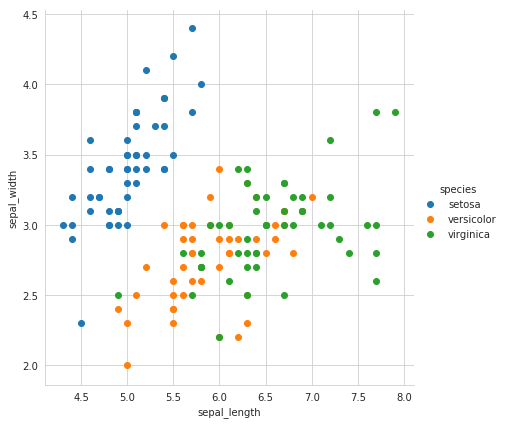

In [6]:
sbn.set_style('whitegrid')
sbn.FacetGrid(iris,hue="species",height=6).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()
plt.close()

#### Observations:
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Separating Versicolor from Virginica is much harder as they have a considerable overlab

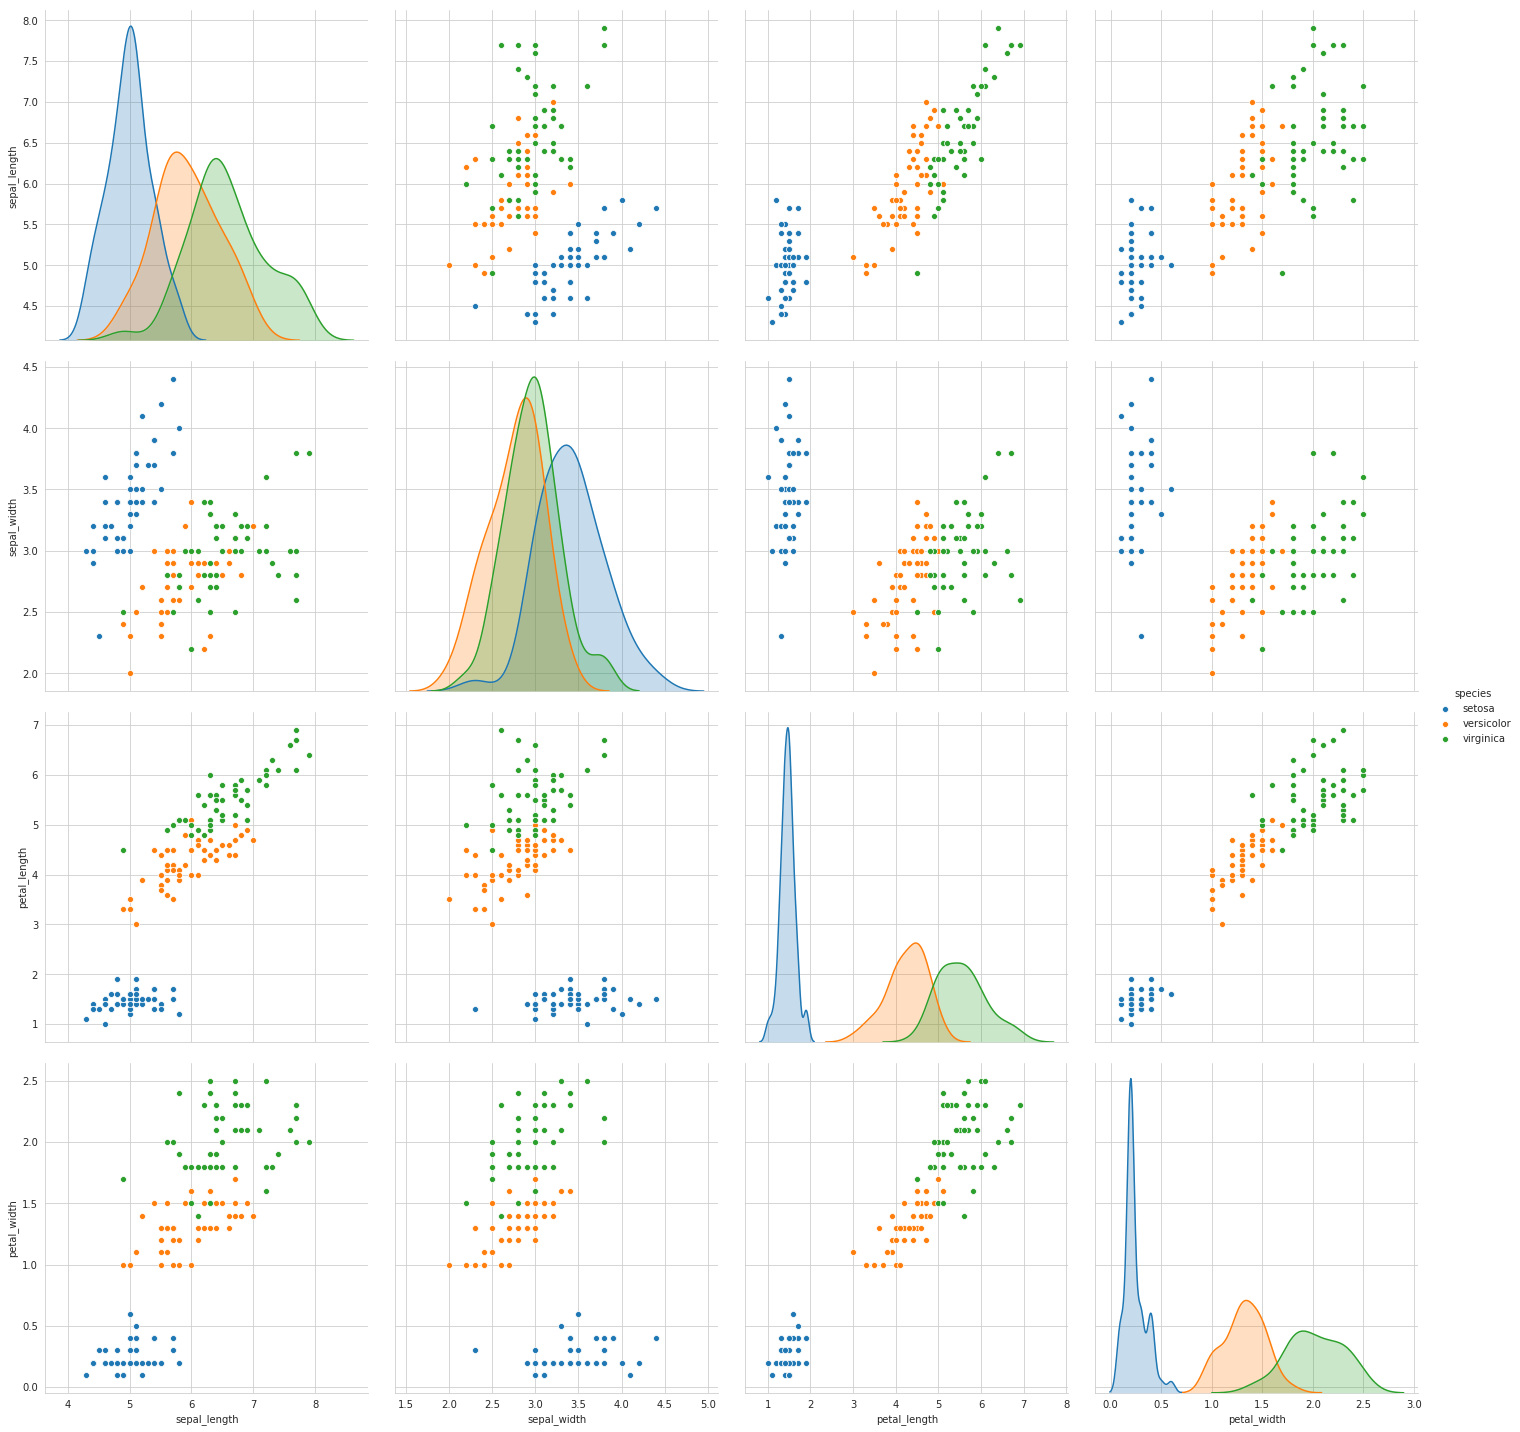

In [7]:
# Pair Plot
sbn.set_style("whitegrid")
sbn.pairplot(iris,hue="species",height=5)
plt.show()

#### Observations
1. Petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly separable), Virginica and versicolor have soe overlap (almost linearly separable)

 # Histogram, PDF, CDF

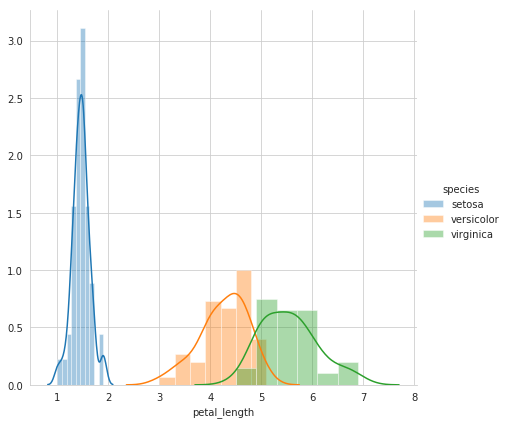

In [8]:
sbn.FacetGrid(iris, hue="species",height=6).map(sbn.distplot,"petal_length").add_legend()
plt.show()

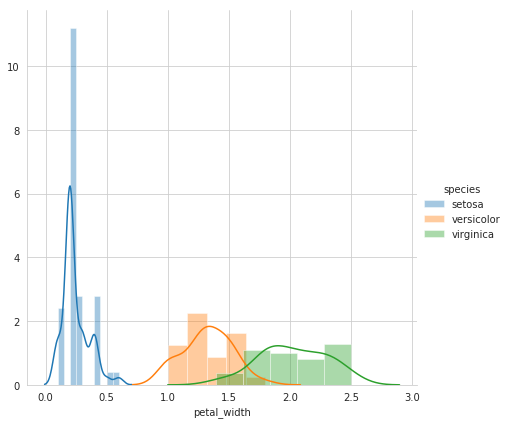

In [9]:
sbn.FacetGrid(iris, hue="species",height=6).map(sbn.distplot,"petal_width").add_legend()
plt.show()

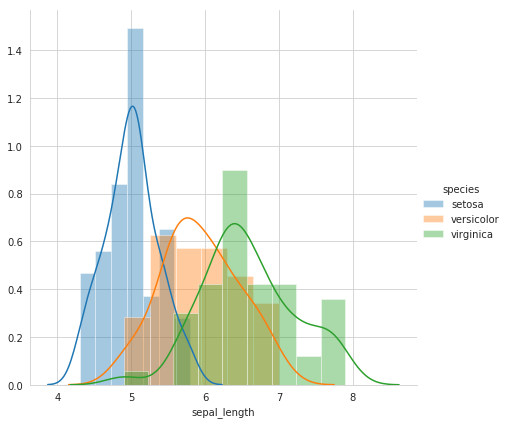

In [10]:
sbn.FacetGrid(iris, hue="species",height=6).map(sbn.distplot,"sepal_length").add_legend()
plt.show()

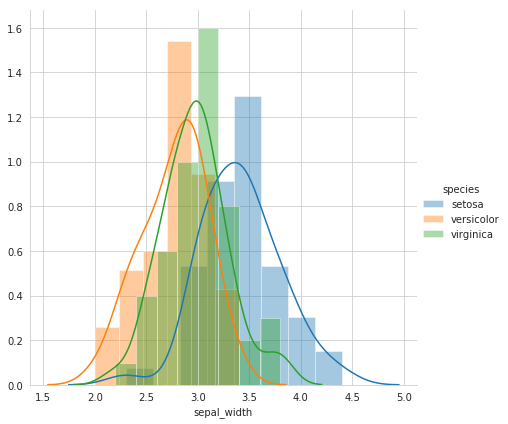

In [11]:
sbn.FacetGrid(iris, hue="species",height=6).map(sbn.distplot,"sepal_width").add_legend()
plt.show()

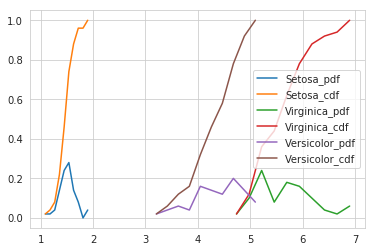

In [12]:
#cdf (cumulative Distribution function) and pdf (Probability distribution)

irisSetosa = iris.loc[iris["species"] == "setosa"]
irisVirginica = iris.loc[iris["species"] == "virginica"]
irisVersicolor = iris.loc[iris["species"] == "versicolor"]

counts, binEdges = np.histogram(irisSetosa['petal_length'],bins=10,density = True)
pdf = counts/(sum(counts))

#compute cdf

cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],pdf,label="Setosa_pdf")
plt.plot(binEdges[1:],cdf,label="Setosa_cdf")


counts, binEdges = np.histogram(irisVirginica['petal_length'],bins=10,density = True)
pdf = counts/(sum(counts))

#compute cdf

cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],pdf,label="Virginica_pdf")
plt.plot(binEdges[1:],cdf,label="Virginica_cdf")


counts, binEdges = np.histogram(irisVersicolor['petal_length'],bins=10,density = True)
pdf = counts/(sum(counts))

#compute cdf
cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],pdf,label="Versicolor_pdf")
plt.plot(binEdges[1:],cdf,label="Versicolor_cdf")
plt.legend()
plt.show()


0.82 or of setosa flower have petal-length <= 1.6

## Mean, Variance and Std-Dev

In [13]:
print("Mean Petal Length")
print("Seteso",np.mean(irisSetosa["petal_length"]))
print("Virginica",np.mean(irisVirginica["petal_length"]))
print("Versicolor",np.mean(irisVersicolor["petal_length"]))

Mean Petal Length
Seteso 1.464
Virginica 5.552
Versicolor 4.26


In [14]:
print("Std-dev Petal Length")
print("Seteso",np.std(irisSetosa["petal_length"]))
print("Virginica",np.std(irisVirginica["petal_length"]))
print("Versicolor",np.std(irisVersicolor["petal_length"]))

Std-dev Petal Length
Seteso 0.17176728442867115
Virginica 0.5463478745268441
Versicolor 0.4651881339845204


### Median, Percentile, Quantile,IQR,MAD

In [22]:
print("Median Petal Length")
print("Seteso",np.median(irisSetosa["petal_length"]))
print("Virginica",np.median(irisVirginica["petal_length"]))
print("Versicolor",np.median(irisVersicolor["petal_length"]))


print("\nQuantiles Petal Length")
print("Seteso",np.percentile(irisSetosa["petal_length"],np.arange(0,100,25)))
print("Virginica",np.percentile(irisVirginica["petal_length"],np.arange(0,100,25)))
print("Versicolor",np.percentile(irisVersicolor["petal_length"],np.arange(0,100,25)))


print("\n90th percentiles Petal Length")
print("Seteso",np.percentile(irisSetosa["petal_length"],90))
print("Virginica",np.percentile(irisVirginica["petal_length"],90))
print("Versicolor",np.percentile(irisVersicolor["petal_length"],90))

from statsmodels import robust
print("\nMAD median absolute deviation of Petal Length")
print("Seteso",robust.mad(irisSetosa["petal_length"]))
print("Virginica",robust.mad(irisVirginica["petal_length"]))
print("Versicolor",robust.mad(irisVersicolor["petal_length"]))

Median Petal Length
Seteso 1.5
Virginica 5.55
Versicolor 4.35

Quantiles Petal Length
Seteso [1.    1.4   1.5   1.575]
Virginica [4.5   5.1   5.55  5.875]
Versicolor [3.   4.   4.35 4.6 ]

90th percentiles Petal Length
Seteso 1.7
Virginica 6.3100000000000005
Versicolor 4.8

MAD median absolute deviation of Petal Length
Seteso 0.14826022185056031
Virginica 0.6671709983275211
Versicolor 0.5189107764769602


### BOX Plot and Whiskers

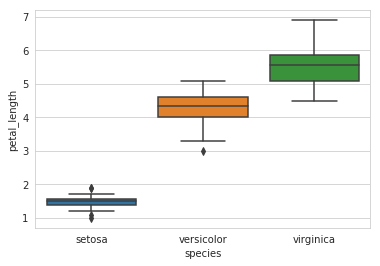

In [37]:
sbn.boxplot(x="species",y="petal_length",data=iris)
plt.show()

### Violin Plot

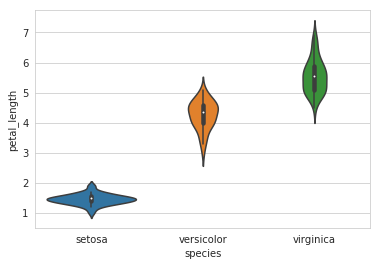

In [35]:
sbn.violinplot(x="species",y="petal_length",data=iris,size=8)
plt.show()

### Multivariate Probablity Density, Contour plot

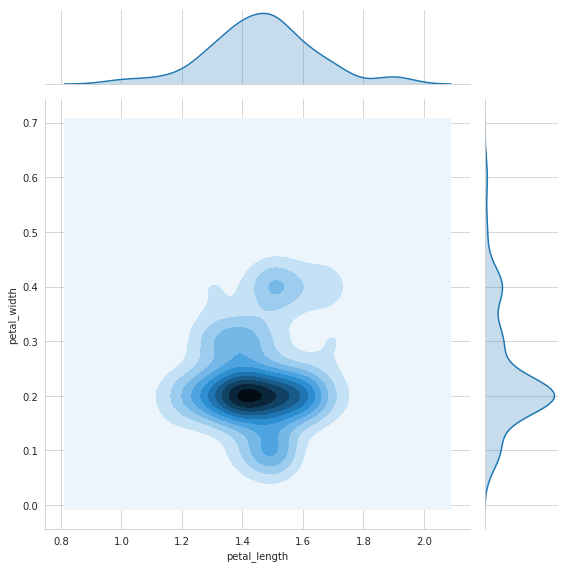

In [42]:
#countour prob-density plot
sbn.jointplot(x="petal_length",y="petal_width",data=irisSetosa, kind="kde",height=8)
plt.show()